# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to C:\Users\Wai Fatt
[nltk_data]     Yee\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Set environment variables from the .env in the local environment
load_dotenv()

True

In [3]:
# Read your api key environment variable
api_key = os.getenv('NEWS_API_KEY')
type(api_key)

str

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {btc_headlines['totalResults']}")

Total articles about Bitcoin: 8556


In [6]:
# Show sample article
btc_headlines["articles"][5]

{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Jon Fingas',
 'title': 'US Treasury issues first-ever sanctions against a cryptocurrency mixer',
 'description': 'Cryptocurrency mixers are sometimes used to help online criminals launder their stolen money by hiding its true origins, and the US Treasury is now ready to clamp down on them when hostile governments are involved. The department has issued its first sanction…',
 'url': 'https://www.engadget.com/us-treasury-sanctions-virtual-currency-mixer-north-korea-203502517.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-11/0db21000-4246-11ec-a8de-edfca39c0e00',
 'publishedAt': '2022-05-06T20:35:02Z',
 'content': 'Cryptocurrency mixers are sometimes used to help online criminals launder their stolen money by hiding its true origins, and the US Treasury is now ready to clamp down on them when hostile government… [+1432 chars]'}

In [7]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {eth_headlines['totalResults']}")

Total articles about Ethereum: 4695


In [8]:
# Show sample article
eth_headlines["articles"][99]

{'source': {'id': None, 'name': 'Motley Fool'},
 'author': 'newsfeedback@fool.com (Chris MacDonald)',
 'title': 'Why Bitcoin, Ethereum, and XRP Are Sinking Today',
 'description': 'Choppiness in the crypto market continues, hitting these three top tokens.',
 'url': 'https://www.fool.com/investing/2022/04/25/why-bitcoin-ethereum-and-xrp-are-sinking-today/',
 'urlToImage': 'https://g.foolcdn.com/editorial/images/676028/bitcoin.jpg',
 'publishedAt': '2022-04-25T16:26:22Z',
 'content': "What happened\r\nIt's been a rather bumpy ride in the world of large-cap cryptocurrencies of late. Today, this volatility has continued, with Bitcoin\xa0( BTC 0.25% ),\xa0Ethereum\xa0( ETH 0.24% ), and\xa0XRP\xa0( XR… [+2697 chars]"}

In [9]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()


,date,text,compound,positive,negative,neutral
0,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882
1,2022-04-08,Its set to open later this year\r\nIf you buy ...,-0.4404,0.000,0.081,0.919
2,2022-04-14,Wikipedia editors have voted in favor of dropp...,0.4019,0.088,0.000,0.912
3,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772
4,2022-05-05,If youve ever felt like introducing some Vegas...,0.7506,0.193,0.000,0.807


In [10]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "date": date,
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()


,date,text,compound,positive,negative,neutral
0,2022-04-14,The US Department of Treasury says Lazarus is ...,-0.7845,0.088,0.231,0.681
1,2022-04-13,"18 with 15 posters participating, including st...",0.1027,0.084,0.071,0.844
2,2022-04-15,"Opera launched its dedicated ""Crypto Browser"" ...",0.7351,0.188,0.000,0.812
3,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879
4,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945


In [11]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.169650,0.073350,0.034090,0.892580
std,0.400979,0.077963,0.061008,0.099485
min,-0.872000,0.000000,0.000000,0.557000
25%,0.000000,0.000000,0.000000,0.830500
50%,0.109050,0.072500,0.000000,0.913000
75%,0.475725,0.127250,0.063500,1.000000
max,0.952000,0.378000,0.329000,1.000000


In [12]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.196697,0.085410,0.034720,0.879860
std,0.402298,0.086937,0.048457,0.091854
min,-0.784500,0.000000,0.000000,0.622000
25%,-0.115300,0.000000,0.000000,0.823750
50%,0.215150,0.069500,0.000000,0.898500
75%,0.498075,0.132500,0.063000,0.938500
max,0.952000,0.378000,0.233000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Between the two coins, Ethereum appears to have the higher mean positve score.

Q: Which coin had the highest compound score?

A: Ethereum recorded the highest compound score between the two coins.

Q. Which coin had the highest positive score?

A: Ethereum appears to have attained the highest positve score compared to Bitcoin.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {"I'm", "ha", "has", "may", "quite", "you've", "you're", "today", "also", "say", "said", "week", "said", "sent", "us", "wa", "yesterday", "yet"}


In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase and remove stop words   
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    return output

In [16]:
# Create a new tokens column for Bitcoin
btc_tokenized_words=[]
n = 0
for n in range(len(btc_df)):
    btc_tokenized_words.append(tokenizer(btc_df.loc[n,'text']))
    n+=1
btc_df['Tokenized Words']=btc_tokenized_words
btc_df

,date,text,compound,positive,negative,neutral,Tokenized Words
0,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882,"[bitcoin, mining, site, powered, otherwise, lo..."
1,2022-04-08,Its set to open later this year\r\nIf you buy ...,-0.4404,0.000,0.081,0.919,"[set, open, later, yearif, buy, something, ver..."
2,2022-04-14,Wikipedia editors have voted in favor of dropp...,0.4019,0.088,0.000,0.912,"[wikipedia, editor, voted, favor, dropping, cr..."
3,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772,"[warren, buffett, always, bitcoin, skeptic, bi..."
4,2022-05-05,If youve ever felt like introducing some Vegas...,0.7506,0.193,0.000,0.807,"[youve, ever, felt, like, introducing, vegasst..."
...,...,...,...,...,...,...,...
95,2022-04-30,Your browser isnt supported anymore. Update it...,0.5003,0.161,0.075,0.764,"[browser, isnt, supported, anymore, update, ge..."
96,2022-04-27,"Fort Worth, Texas just became the first munici...",0.7430,0.186,0.000,0.814,"[fort, worth, texas, became, first, municipali..."
97,2022-04-13,This gives a whole new meaning to the idea of ...,-0.6597,0.000,0.141,0.859,"[give, whole, new, meaning, idea, washing, mon..."
98,2022-04-29,"The Department of Labor, which oversees employ...",0.2263,0.060,0.000,0.940,"[department, labor, oversees, employersponsore..."


In [17]:
# Create a new tokens column for Ethereum
eth_tokenized_words=[]
n = 0
for n in range(len(btc_df)):
    eth_tokenized_words.append(tokenizer(eth_df.loc[n,'text']))
    n+=1
eth_df['Tokenized Words']=eth_tokenized_words
eth_df

,date,text,compound,positive,negative,neutral,Tokenized Words
0,2022-04-14,The US Department of Treasury says Lazarus is ...,-0.7845,0.088,0.231,0.681,"[department, treasury, lazarus, behind, attack..."
1,2022-04-13,"18 with 15 posters participating, including st...",0.1027,0.084,0.071,0.844,"[poster, participating, including, story, auth..."
2,2022-04-15,"Opera launched its dedicated ""Crypto Browser"" ...",0.7351,0.188,0.000,0.812,"[opera, launched, dedicated, crypto, browser, ..."
3,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879,"[multibillion, dollar, cryptocurrency, company..."
4,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945,"[bored, ape, yacht, club, creator, yuga, labs,..."
...,...,...,...,...,...,...,...
95,2022-04-22,"What happened\r\nTwo of the top altcoins, Ethe...",0.4939,0.113,0.000,0.887,"[happenedtwo, top, altcoins, ethereum, eth, do..."
96,2022-05-05,What happened \r\nAs investors sell off stocks...,0.0000,0.000,0.000,1.000,"[happenedas, investor, sell, stock, broadly, r..."
97,2022-04-12,Crypto coin Shiba Inu jumped more than 20% on ...,0.6908,0.144,0.000,0.856,"[crypto, coin, shiba, inu, jumped, tuesday, br..."
98,2022-04-10,2021 was the year of Ethereum ( ETH 0.08% ).\r...,0.5423,0.164,0.000,0.836,"[year, ofethereum, eth, proofofstake, cryptocu..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
#Convert nested list to a flat list
btc_processed =[]
for elem in btc_tokenized_words:
    for item in elem:
        btc_processed.append(item)

In [20]:
btc_headlines["articles"][1]

{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Jay Peters',
 'title': 'Block and Blockstream are partnering with Tesla on an off-grid, solar-powered Bitcoin mine in Texas',
 'description': 'Block and Blockstream are partnering with Tesla on an open-source, solar-powered Bitcoin mine, the companies announced Friday. Tesla’s 3.8-megawatt Solar PV array and its 12 megawatt-hour Megapack will power the facility, and construction has started on the p…',
 'url': 'https://www.theverge.com/2022/4/8/23016553/block-blockstream-tesla-solar-bitcoin-mine-texas',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/OYrvaaOHBuEpdTeRO55nZnZdexs=/0x215:3000x1786/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/8937281/acastro_170726_1777_0007_v2.jpg',
 'publishedAt': '2022-04-08T16:02:52Z',
 'content': 'Its set to open later this year\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nIllustration by Alex Castro / The Verge\r\n

In [21]:
# Generate the Bitcoin N-grams where N=2
bigram_counts = Counter(ngrams(btc_processed, n=2))
print(dict(bigram_counts))

{('bitcoin', 'mining'): 2, ('mining', 'site'): 1, ('site', 'powered'): 1, ('powered', 'otherwise'): 1, ('otherwise', 'lost'): 1, ('lost', 'gas'): 1, ('gas', 'oil'): 1, ('oil', 'well'): 1, ('well', 'near'): 1, ('near', 'linden'): 1, ('linden', 'texas'): 1, ('texas', 'april'): 1, ('april', 'th'): 2, ('th', 'photo'): 1, ('photo', 'francois'): 1, ('francois', 'picardafp'): 1, ('picardafp', 'via'): 1, ('via', 'getty'): 1, ('getty', 'images'): 1, ('images', 'corporate'): 1, ('corporate', 'climate'): 1, ('climate', 'hype'): 1, ('hype', 'fl'): 1, ('fl', 'char'): 1, ('char', 'set'): 1, ('set', 'open'): 1, ('open', 'later'): 1, ('later', 'yearif'): 1, ('yearif', 'buy'): 1, ('buy', 'something'): 1, ('something', 'verge'): 1, ('verge', 'link'): 1, ('link', 'vox'): 1, ('vox', 'media'): 1, ('media', 'earn'): 1, ('earn', 'commission'): 1, ('commission', 'see'): 1, ('see', 'ethic'): 1, ('ethic', 'statementillustration'): 1, ('statementillustration', 'alex'): 1, ('alex', 'castro'): 1, ('castro', 'verge

In [22]:
#Convert nested list to a flat list
eth_processed =[]
for elem in eth_tokenized_words:
    for item in elem:
        eth_processed.append(item)
# Generate the Ethereum N-grams where N=2
bigram_counts = Counter(ngrams(eth_processed, n=2))
print(dict(bigram_counts))

{('department', 'treasury'): 1, ('treasury', 'lazarus'): 1, ('lazarus', 'behind'): 1, ('behind', 'attackthe'): 1, ('attackthe', 'treasury'): 1, ('treasury', 'department'): 4, ('department', 'blame'): 1, ('blame', 'north'): 1, ('north', 'korean'): 6, ('korean', 'hacking'): 2, ('hacking', 'group'): 2, ('group', 'lazarus'): 2, ('lazarus', 'stealing'): 1, ('stealing', 'million'): 1, ('million', 'cryptocurrency'): 2, ('cryptocurrency', 'ronin'): 1, ('ronin', 'networ'): 1, ('networ', 'char'): 1, ('char', 'poster'): 1, ('poster', 'participating'): 1, ('participating', 'including'): 1, ('including', 'story'): 1, ('story', 'authormore'): 1, ('authormore', 'longtime'): 1, ('longtime', 'wikipedia'): 2, ('wikipedia', 'editor'): 2, ('editor', 'requested'): 2, ('requested', 'wikimedia'): 2, ('wikimedia', 'foundation'): 2, ('foundation', 'stop'): 2, ('stop', 'accepting'): 2, ('accepting', 'cryptocurrency'): 2, ('cryptocurrency', 'donationsthe'): 1, ('donationsthe', 'foundatio'): 1, ('foundatio', 'cha

In [23]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [24]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_processed, N=10)

[('char', 94),
 ('bitcoin', 55),
 ('reuters', 30),
 ('cryptocurrency', 26),
 ('april', 22),
 ('crypto', 16),
 ('world', 15),
 ('cryptocurrencies', 13),
 ('new', 12),
 ('year', 9)]

In [25]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_processed, N=10)

[('char', 100),
 ('cryptocurrency', 28),
 ('ethereum', 25),
 ('crypto', 20),
 ('year', 16),
 ('world', 12),
 ('cryptocurrencies', 12),
 ('bitcoin', 11),
 ('eth', 11),
 ('market', 11)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20.0, 10.0]

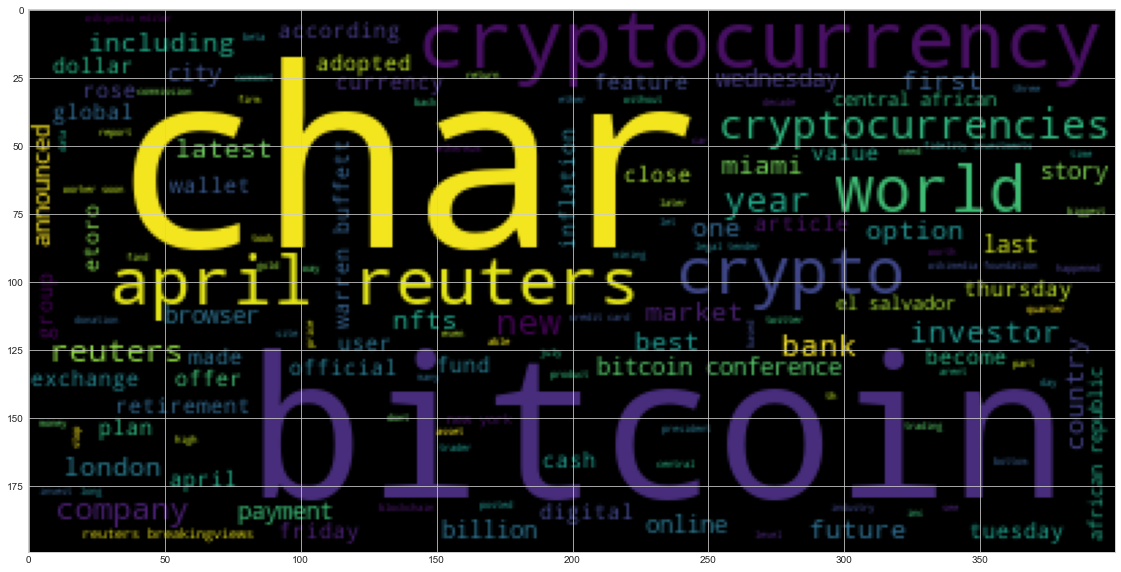

In [27]:
# Generate the Bitcoin word cloud
big_string = ' '.join(btc_processed)
btc_wc = WordCloud().generate(big_string)
plt.imshow(btc_wc)

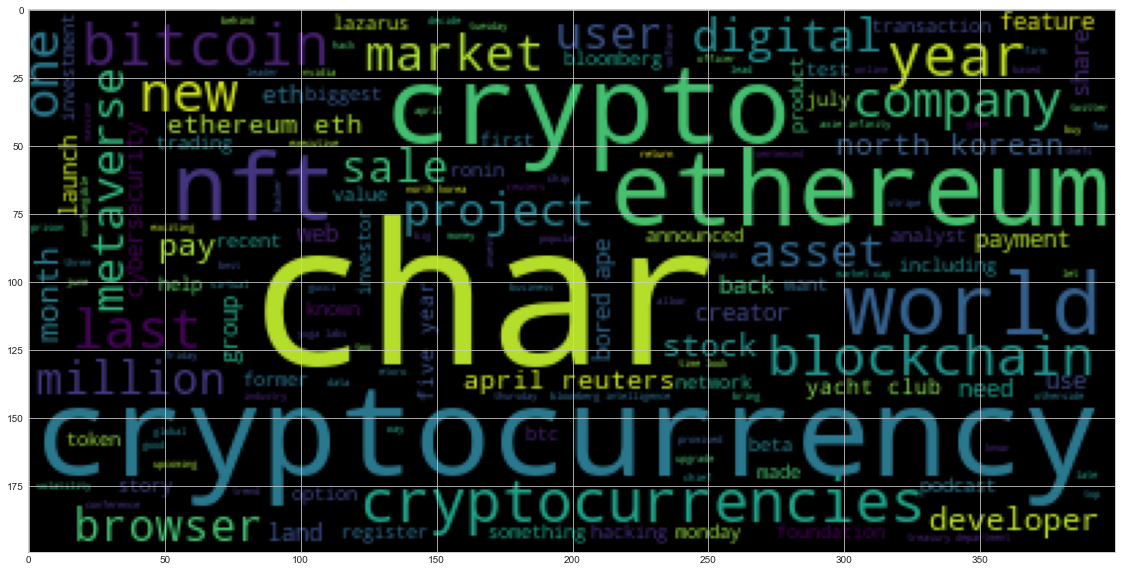

In [28]:
# Generate the Ethereum word cloud
big_string = ' '.join(eth_processed)
eth_wc = WordCloud().generate(big_string)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [29]:
import spacy
from spacy import displacy

In [30]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [31]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [32]:
# Concatenate all of the Bitcoin text together
btc_texts = []
n=0
for n in range (len(btc_df)):
    btc_texts.append(btc_df.loc[n,'text'])
    n += 1
btc_string = ' '.join([str(item) for item in btc_texts])
btc_string

'A Bitcoin mining site powered by otherwise lost gas from an oil well near Linden, Texas, on April 4th, 2022. | Photo by FRANCOIS PICARD/AFP via Getty Images\r\n\n \n\n Of all the corporate climate hype fl… [+6544 chars] Its set to open later this year\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nIllustration by Alex Castro / The Verge\r\nBlock and Blockstream, a … [+1336 chars] Wikipedia editors have voted in favor of dropping cryptocurrency from the Wikimedia Foundation\'s donation options. As Ars Technica reports, an editor for the online encyclopedia called GorillaWarfare… [+1577 chars] Warren Buffett has always been a bitcoin skeptic. But the billionaire investor had his most harsh words yet for the cryptocurrency over the weekend. Buffett made it clear that his opposition to crypt… [+2297 chars] If youve ever felt like introducing some Vegas-style odds into your retirement plan, youre finally in luck.\r\nLast week, Fidel

In [33]:
# Run the NER processor on all of the text
doc = nlp(btc_string)
# Add a title to the document
# YOUR CODE HERE!

In [34]:
# Render the visualization
displacy.render(doc, style='ent')

In [35]:
print(doc.ents)

(Linden, Texas, April 4th, 2022, FRANCOIS PICARD/AFP, Getty Images, later this year, Verge, Vox Media, Alex Castro, Verge, Wikipedia, the Wikimedia Foundation's, Ars Technica, GorillaWarfare, Warren Buffett, the weekend, Buffett, Last week, Fidelity Investments, the US Treasury, April 12, Reuters, $10 billion, MIAMI BEACH, April 7, Reuters, Samson Mow, Thursday, Jan3, Jack Dorsey, three, Cash App, Bitcoin 2022, Thursday, CoinDesk, Intelligence, Cash App, 18, 15, More than 200, Wikipedia, the Wikimedia Foundation, April 26, Reuters, 5.1%, 38,391.36, Tuesday, 2,229.82, Bitcoin, 16%, year, +339, May 4, Reuters, 5.7%, 39,862.84, Wednesday, 2,102.94, Bitcoin, 20.9%, year, AMC, April 15, AMC, Adam Aron, moviego, Crypto Browser, January, Windows, Mac, Android, The Central African Republic, second, El Salvador, Wednesday, Faustin Archange, May 5, Reuters, Jack Dorsey, Thursday, the first quarter, April 29, Reuters, The Swiss National Bank, Thomas Jordan, annual, Friday, April 7, Reuters, Hondu

In [36]:
# List all Entities
print([ent.text for ent in doc.ents])

['Linden', 'Texas', 'April 4th', '2022', 'FRANCOIS PICARD/AFP', 'Getty Images', 'later this year', 'Verge', 'Vox Media', 'Alex Castro', 'Verge', 'Wikipedia', "the Wikimedia Foundation's", 'Ars Technica', 'GorillaWarfare', 'Warren Buffett', 'the weekend', 'Buffett', 'Last week', 'Fidelity Investments', 'the US Treasury', 'April 12', 'Reuters', '$10 billion', 'MIAMI BEACH', 'April 7', 'Reuters', 'Samson Mow', 'Thursday', 'Jan3', 'Jack Dorsey', 'three', 'Cash App', 'Bitcoin 2022', 'Thursday', 'CoinDesk', 'Intelligence', 'Cash App', '18', '15', 'More than 200', 'Wikipedia', 'the Wikimedia Foundation', 'April 26', 'Reuters', '5.1%', '38,391.36', 'Tuesday', '2,229.82', 'Bitcoin', '16%', 'year', '+339', 'May 4', 'Reuters', '5.7%', '39,862.84', 'Wednesday', '2,102.94', 'Bitcoin', '20.9%', 'year', 'AMC', 'April 15', 'AMC', 'Adam Aron', 'moviego', 'Crypto Browser', 'January', 'Windows, Mac', 'Android', 'The Central African Republic', 'second', 'El Salvador', 'Wednesday', 'Faustin Archange', 'May

---

### Ethereum NER

In [37]:
# Concatenate all of the Ethereum text together
eth_texts = []
n=0
for n in range (len(eth_df)):
    eth_texts.append(eth_df.loc[n,'text'])
    n += 1
eth_string = ' '.join([str(item) for item in eth_texts])
eth_string

'The US Department of Treasury says Lazarus is behind the attack\r\nThe US Treasury Department blames North Korean hacking group Lazarus for stealing $625 million in cryptocurrency from the Ronin networ… [+1853 chars] 18 with 15 posters participating, including story author\r\nMore than 200 long-time Wikipedia editors have requested that the Wikimedia Foundation stop accepting cryptocurrency donations.\xa0The foundatio… [+4016 chars] Opera launched its dedicated "Crypto Browser" into beta back in January, promising to make Web3 as accessible as any Web2 website. The company released the browser for Windows, Mac and Android users … [+1563 chars] A multi-billion dollar cryptocurrency company has apologised to users after its sale of metaverse land sparked a frenzy that temporarily brought down the Ethereum cryptocurrency.\r\nYuga Labs, the comp… [+3475 chars] When Bored Ape Yacht Club creators Yuga Labs announced its Otherside NFT collection would launch on April 30, it was predicted by 

In [38]:
# Run the NER processor on all of the text
doc_ = nlp(eth_string)

# Add a title to the document
# YOUR CODE HERE!

In [39]:
# Render the visualization
displacy.render(doc_, style='ent')

In [40]:
# List all Entities
print([ent.text for ent in doc_.ents])

['The US Department of Treasury', 'Lazarus', 'The US Treasury Department', 'North Korean', 'Lazarus', '$625 million', 'Ronin', '18', '15', 'More than 200', 'Wikipedia', 'the Wikimedia Foundation', 'Crypto Browser', 'January', 'Windows, Mac', 'Android', 'Ethereum', 'Yuga Labs', 'Bored Ape Yacht Club', 'Yuga Labs', 'Otherside', 'April 30', 'NFT', 'Ethereum', 'more than five years', '100,000', 'North Korea', 'US', 'NBC News', 'April 26', 'Reuters', 'No.2', 'second', 'The Brave Browser', 'Chrome', 'Brave', 'AMC', 'April 15', 'AMC', 'Adam Aron', 'moviego', 'the "Bored Apes Yacht Club', 'Last night', 'Bloomberg', 'nearly a third', 'a billion dollars', 'Early this week', 'the Ukrainian Computer Emergency Response Team', 'Slovakian', 'Russia', 'GRU Sandworm', 'One', 'Ethereum', 'Merge', 'a few months after June', 'first', 'a year and a half ago', 'The Order Flow', 'Dan Robinson', "Georgios Konstantopoulos'", 'Ethereum', 'Dark Forest', 'August 20', 'April 26', 'Reuters', '5.1%', '38,391.36', 'T

---